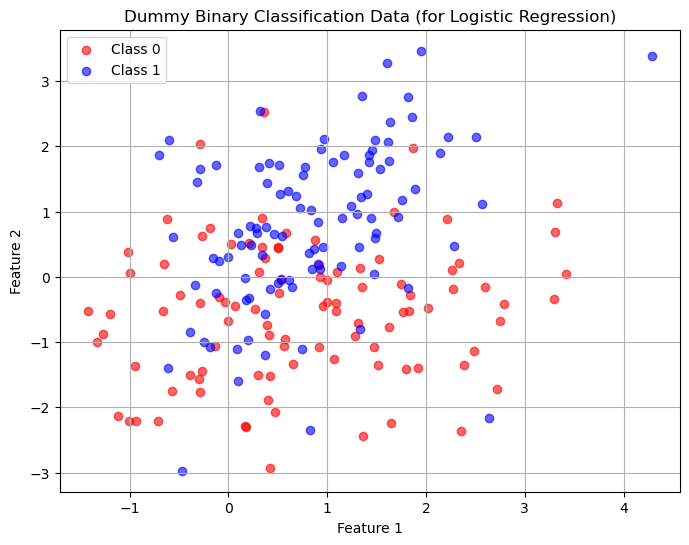

Features shape: (200, 2)
Target shape: (200,)


In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Set seed
np.random.seed(42)

# Generate a classification dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,         
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.8,         
    flip_y=0.1,            
    random_state=42
)


plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="Class 0", alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1", alpha=0.6)
plt.title("Dummy Binary Classification Data (for Logistic Regression)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


print("Features shape:", X.shape)
print("Target shape:",y.shape)

(200, 2)
(2, 1)
Bias: 0.06867767226803116
0.5457773663957485


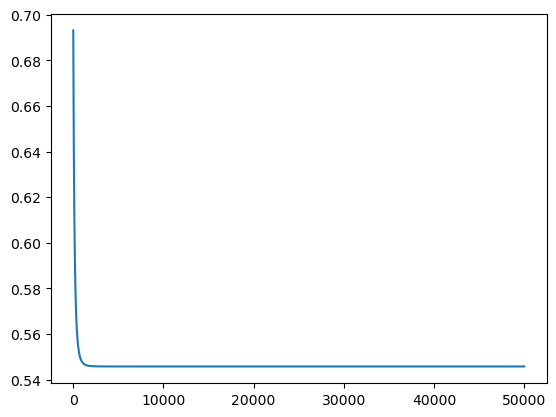

In [12]:
y=y.reshape(-1, 1)
m = X.shape[0]
print(X.shape)
w = np.array([[0] , [0]] )  
b = 0
alpha = 0.01

allCost = []

for i in range(50000):
    z = X @ w + b
    y_pred = 1 / (1 + np.exp(-z)) 
    cost = - (1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    allCost.append(cost)
    
    
    dw = (1 / m) * (X.T @ (y_pred - y)) 
    db = (1 / m) * np.sum(y_pred - y) 
    
  
    w = w - alpha * dw
    b = b - alpha * db
print(w.shape)
print("Bias:", b)
print(allCost[-1])   

plt.plot(allCost)
plt.show()

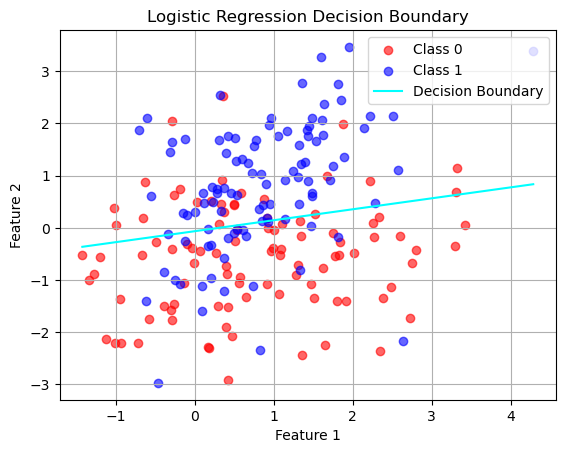

In [5]:
import matplotlib.pyplot as plt
y = y.flatten()
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="Class 0", alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1", alpha=0.6)
x1_column = [row[0] for row in X] 
min_x = min(x1_column)
max_x = max(x1_column)
step = (max_x - min_x) / 99
x1_vals = [min_x + i * step for i in range(100)]

x2_vals = [float(-(w[0][0] * x1 + b) / w[1][0]) for x1 in x1_vals]
plt.plot(x1_vals, x2_vals, color='cyan', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

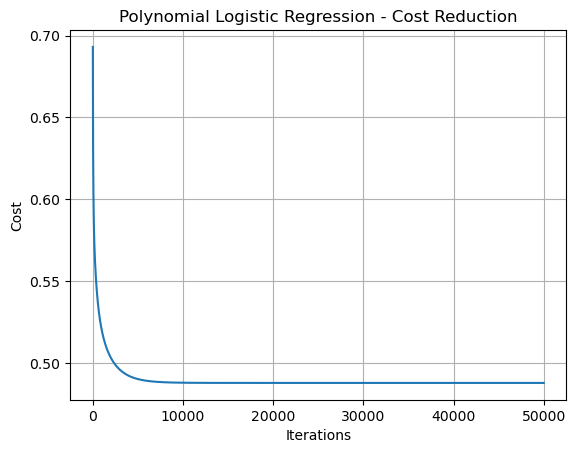

0.4877319777852675


In [13]:
import numpy as np
import matplotlib.pyplot as plt
# Extract features and target
x1 = X[:, 0].reshape(-1, 1)
x2 = X[:, 1].reshape(-1, 1)
y = y.reshape(-1, 1)

# Feature normalization
mean_x1, std_x1 = np.mean(x1), np.std(x1)
mean_x2, std_x2 = np.mean(x2), np.std(x2)

x1_norm = (x1 - mean_x1) / std_x1
x2_norm = (x2 - mean_x2) / std_x2
# Polynomial features
x1_sq = x1_norm ** 2
x2_sq = x2_norm ** 2
x1_cube = x1_norm ** 3
x2_cube = x2_norm ** 3

x1x2 = x1_norm * x2_norm

X_poly = np.hstack((x1_norm, x2_norm, x1_sq, x2_sq, x1x2, x1_cube, x2_cube))
m, n = X_poly.shape

# Initialize weights and bias
w = np.zeros((n, 1))
b = 0
alpha = 0.01
num_iters = 50000
allCost = []

# Gradient descent
for i in range(num_iters):
    z = X_poly @ w + b
    y_pred = 1 / (1 + np.exp(-z))

    # Cost function (with small epsilon to avoid log(0))
    epsilon = 1e-8
    cost = -(1/m) * np.sum(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
    allCost.append(cost)

    # Gradients
    dw = (1 / m) * (X_poly.T @ (y_pred - y))
    db = (1 / m) * np.sum(y_pred - y)

    # Parameter update
    w -= alpha * dw
    b -= alpha * db

# Plot cost over iterations
plt.plot(allCost)
plt.title("Polynomial Logistic Regression - Cost Reduction")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show() 
print(allCost[-1])

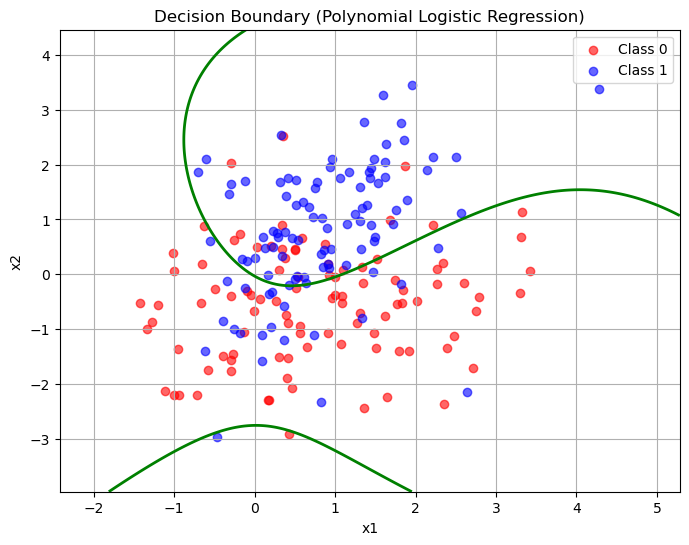

0.4877319777852675


In [16]:
# Flatten y for plotting
y = y.flatten()

# Plot original data points
plt.figure(figsize=(8, 6))
plt.scatter(x1[y == 0], x2[y == 0], color="red", label="Class 0", alpha=0.6)
plt.scatter(x1[y == 1], x2[y == 1], color="blue", label="Class 1", alpha=0.6)

# Create meshgrid for decision boundary
x1_min, x1_max = x1.min() - 1, x1.max() + 1
x2_min, x2_max = x2.min() - 1, x2.max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 300),
                       np.linspace(x2_min, x2_max, 300))

# Normalize meshgrid
xx1_norm = (xx1 - mean_x1) / std_x1
xx2_norm = (xx2 - mean_x2) / std_x2

# Flatten and create polynomial features for grid
xx1_flat = xx1_norm.ravel().reshape(-1, 1)
xx2_flat = xx2_norm.ravel().reshape(-1, 1)
xx1_sq = xx1_flat ** 2
xx2_sq = xx2_flat ** 2
xx1x2 = xx1_flat * xx2_flat
xx1_cube = xx1_flat ** 3
xx2_cube = xx2_flat ** 3

X_grid = np.hstack((xx1_flat, xx2_flat, xx1_sq, xx2_sq, xx1x2, xx1_cube, xx2_cube))

# Predict for grid points
z = X_grid @ w + b
y_pred = 1 / (1 + np.exp(-z))
y_pred = y_pred.reshape(xx1.shape)

# Plot decision boundary
plt.contour(xx1, xx2, y_pred, levels=[0.5], colors='green', linewidths=2)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary (Polynomial Logistic Regression)")
plt.legend()
plt.grid(True)
plt.show()
print(allCost[-1])
